In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## 1. Gather data
#### Import data
First and second rows of csv are set as headers. We only need first so drop second.

In [3]:
df = pd.read_csv('data.csv', header=[0])
df = df.drop(df.index[[0]])
df.shape

(10169, 35)

#### Drop columns that are not required

In [4]:
df = df.drop(columns=['Ball'])
df.shape

(10169, 34)

## 2. Assess/Clean
#### List remaining col names

In [5]:
list(df.columns)

['Club',
 'Club Speed',
 'Attack Angle',
 'Club Path',
 'Low Point',
 'Swing Plane',
 'Swing Direction',
 'Dyn. Loft',
 'Face Angle',
 'Face To Path',
 'Ball Speed',
 'Smash Factor',
 'Launch Angle',
 'Launch Direction',
 'Spin Rate',
 'Spin Axis',
 'Max Height - Dist.',
 'Max Height - Height',
 'Max Height - Side',
 'Last data Point - Length',
 'Last data Point - Side',
 'Last data Point - Height',
 'Last data Point - Time',
 'Carry Flat - Length',
 'Carry Flat - Side',
 'Carry Flat - Land. Angle',
 'Carry Flat - Ball Speed',
 'Carry Flat - Time',
 'Total',
 'Side Total',
 'Dynamic Lie',
 'Impact Offset',
 'Impact Height',
 'Curve']

#### Get only swings labelled as Driver

In [6]:
df = df[df['Club'] == 'Driver']
df.head()


,Club,Club Speed,Attack Angle,Club Path,Low Point,Swing Plane,Swing Direction,Dyn. Loft,Face Angle,Face To Path,...,Carry Flat - Side,Carry Flat - Land. Angle,Carry Flat - Ball Speed,Carry Flat - Time,Total,Side Total,Dynamic Lie,Impact Offset,Impact Height,Curve
1,Driver,87.85343593,0.775,2.541,-0.826771654,54.771,3.089,10.886,-3.002,-5.543,...,-18.4510903,18.14669052,72.29461445,3.73667,211.1884376,-26.94829178,NaN,NaN,NaN,-35.33800773
2,Driver,93.90882248,1.123,1.535,-1.220472441,53.859,2.356,9.287,0.747,-0.788,...,0.609679459,15.34821803,78.7016999,3.46965,219.5067402,0.196844595,NaN,NaN,NaN,-5.541544559
3,Driver,94.77451682,NaN,NaN,NaN,51.358,1.175,NaN,NaN,NaN,...,-3.836037506,44.00031097,60.14810943,6.75169,235.6025707,-4.084941913,NaN,NaN,NaN,NaN
4,Driver,94.3293665,NaN,NaN,NaN,52.158,-2.023,NaN,NaN,NaN,...,-8.590043774,39.48587065,60.07020526,6.30518,235.0102209,-9.343194603,NaN,NaN,NaN,NaN
5,Driver,92.26691124,0.477,0.671,-0.511811024,55.176,1.003,12.803,-7.837,-8.507,...,-48.00254026,25.67797516,64.53268171,4.81192,228.5802886,-60.62426861,NaN,NaN,NaN,-75.9272069


## 2. Assess/Clean
#### Assess for missing data

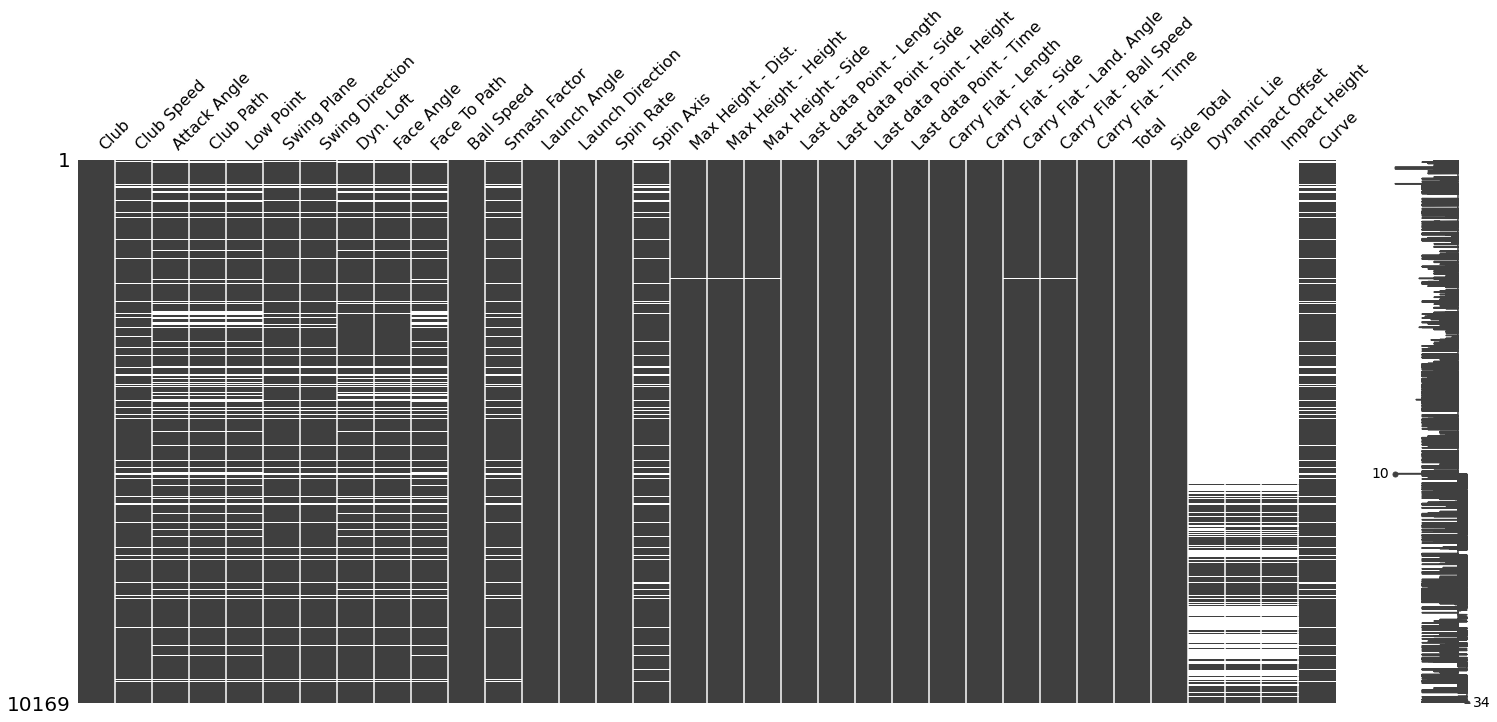

,Club,Club Speed,Attack Angle,Club Path,Low Point,Swing Plane,Swing Direction,Dyn. Loft,Face Angle,Face To Path,...,Carry Flat - Side,Carry Flat - Land. Angle,Carry Flat - Ball Speed,Carry Flat - Time,Total,Side Total,Dynamic Lie,Impact Offset,Impact Height,Curve
count,10169,9521,8697,8697,8697,9403,9403,9079,9079,8695,...,10169,10152,10152,10169,10168,10168,2284,2331,2331,9231
unique,1,7522,4757,4987,574,7514,7578,7443,6950,7138,...,10153,10152,10141,10136,10152,10152,2284,2331,2331,9231
top,Driver,100.8254295,0.1,0,1.771653543,50.102,6.562,15.355,-0.884,-3.75,...,0,10.4426753,63.91178222,0,0,0,68.54472867,-13.91762792,-1.620595665,15.94575042
freq,10169,5,60,45,47,6,6,5,7,6,...,17,1,2,17,17,17,1,1,1,1


In [7]:
msno.matrix(df)
plt.show()
df.describe()


#### Drop columns that have a large proportion of missing data
We would have liked to have kept both Impact offset and Impact height as this tells us how close the impact was to the sweet
spot on the club head. But there is just too much missing data. However, smash factor is a good pseudo measure of
this ability to hit the sweet spot as it is the ratio of ball speed to club speed, and you maximise this transfer of
energy by hitting the sweet spot.

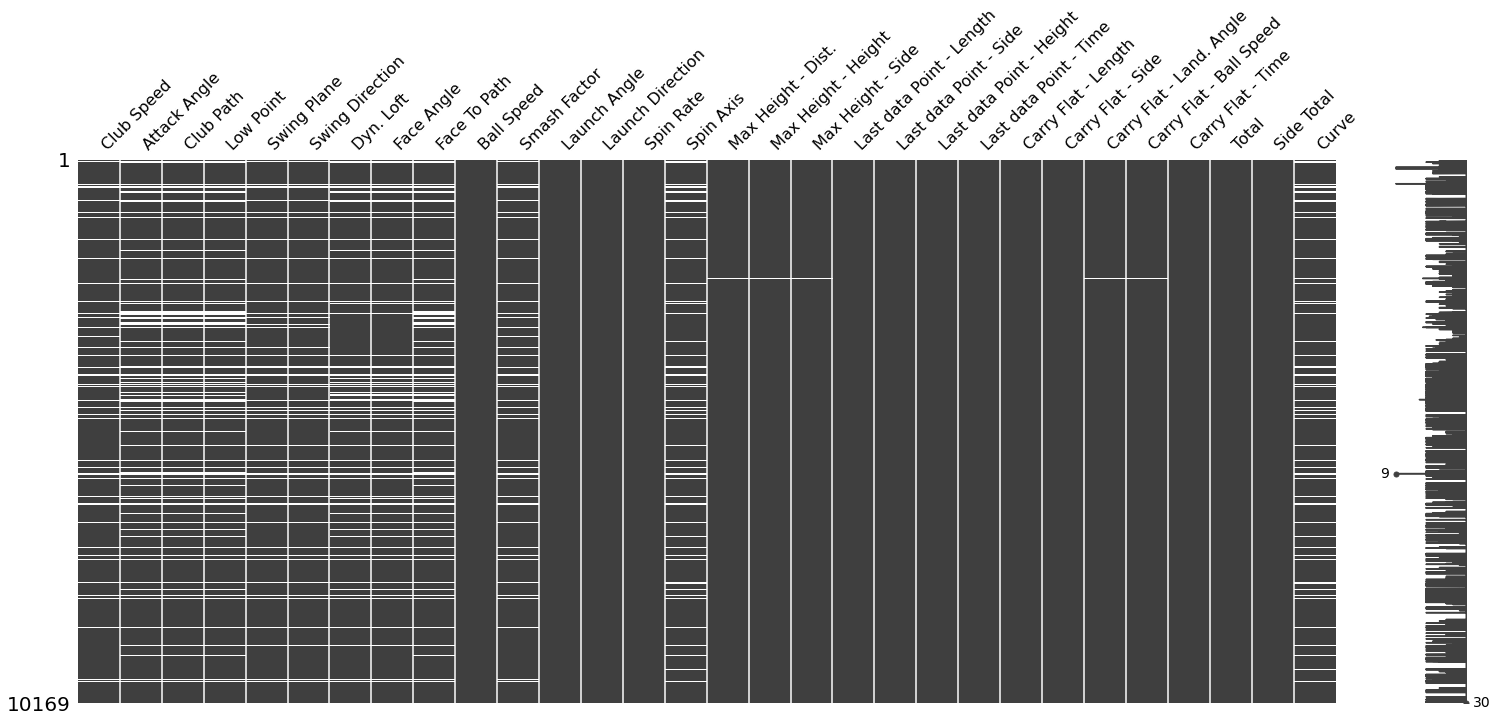

,Club Speed,Attack Angle,Club Path,Low Point,Swing Plane,Swing Direction,Dyn. Loft,Face Angle,Face To Path,Ball Speed,...,Last data Point - Height,Last data Point - Time,Carry Flat - Length,Carry Flat - Side,Carry Flat - Land. Angle,Carry Flat - Ball Speed,Carry Flat - Time,Total,Side Total,Curve
count,9521,8697,8697,8697,9403,9403,9079,9079,8695,10165,...,10169,10169,10169,10169,10152,10152,10169,10168,10168,9231
unique,7522,4757,4987,574,7514,7578,7443,6950,7138,10038,...,10153,9616,10153,10153,10152,10141,10136,10152,10152,9231
top,100.8254295,0.1,0,1.771653543,50.102,6.562,15.355,-0.884,-3.75,127.1315766,...,0,0,0,0,10.4426753,63.91178222,0,0,0,15.94575042
freq,5,60,45,47,6,6,5,7,6,3,...,17,17,17,17,1,2,17,17,17,1


In [8]:
df = df.drop(columns=['Dynamic Lie', 'Impact Offset', 'Impact Height', 'Club'])
msno.matrix(df)
plt.show()
df.describe()

#### How much data left if we drop all nans
The majority of our missing data is related to metrics that characterise the behaviour of the club head at impact. Given
that 1) each swing is considered to be independent and 2) these are critical variables to our analyses it may not be
appropriate to impute them with the mean/median, so we will first assess the model by removing all missing data.

For X, we only want variables related to the moment of impact as the other variables occur as a result of these.
Therefore we will only select variables the characterise the club-ball impact.

In [9]:
df = df[['Club Speed', 'Attack Angle', 'Club Path', 'Low Point', 'Swing Plane', 'Swing Direction', 'Dyn. Loft',
         'Face Angle', 'Face To Path', 'Ball Speed', 'Smash Factor', 'Side Total', 'Total']]
df['Total'] = df['Total'].replace(0, np.nan) # anything with a zero should be considered an error
df = df.dropna()
df.shape

(8675, 13)

#### Set data types

In [10]:
df = df.apply(pd.to_numeric, errors='ignore')

#### Histograms of dependant variables

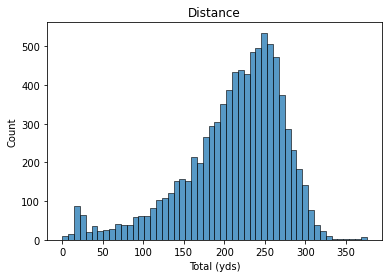

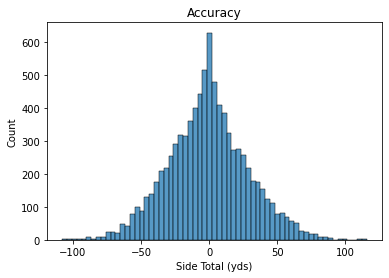

In [11]:
ax = sns.histplot(data=df, x="Total")
ax.set_xlabel('Total (yds)')
ax.set_ylabel('Count')
ax.set_title('Distance')
plt.show()

ax2 = sns.histplot(data=df, x='Side Total')
ax2.set_xlabel('Side Total (yds)')
ax2.set_ylabel('Count')
ax2.set_title('Accuracy')
plt.show()

#### Assess outliers

There are a number of outliers. We have no reason to think they are due to measurement error. Given they also only account
for a small proportion we will leave them for this model iteration.

In [12]:
def count_outliers(data):
    """
    Calculate the Z scores for each value, and find the number of those that sit outside of 3 standard deviations
    :param data: a column of data e.g. a panda series.
    :return n_outliers: a count of the number of values greater than 3 SDs
    """
    z_scores = stats.zscore(data)
    abs_z_scores = np.abs(z_scores)
    n_outliers_bool_array = (abs_z_scores > 3)  # find those values that sit outside of 3 standard deviations
    n_outliers = np.count_nonzero(n_outliers_bool_array)
    return n_outliers

for column in df:
    col = df[column]
    print(column, ':', round(count_outliers(col)/col.shape[0], 3),'%')

Club Speed : 0.028 %
Attack Angle : 0.001 %
Club Path : 0.002 %
Low Point : 0.002 %
Swing Plane : 0.013 %
Swing Direction : 0.002 %
Dyn. Loft : 0.023 %
Face Angle : 0.012 %
Face To Path : 0.012 %
Ball Speed : 0.027 %
Smash Factor : 0.024 %
Side Total : 0.003 %
Total : 0.018 %


## 3. Analyse/Model
#### Correlation matrix and biplot
We will look at the relationship between the variables in 2 ways.
1. A correlation plot to see how the variables are interrelated.
2. A biplot to see which variables explain similar variance.

The correlation and bi plot tells us how closely the variables are related to each other. But using the in conjunction
with each other helps us determine what should be entered into the model.

For example, we can see that ball speed and club speed are well correlated. But inspection of the bi plot tells us that
ball and club speed also are closely related to smash factor (which we would have expected as smash factor is ratio
of ball speed to club speed.

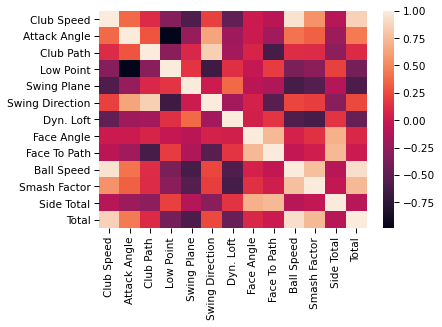

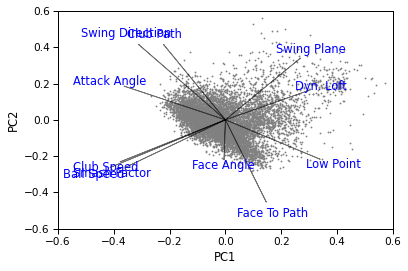

In [13]:
corrMatrix = df.corr()
sns.set_context('paper', font_scale=1.2)
sns.heatmap(corrMatrix)
plt.show()

X = df[['Club Speed', 'Attack Angle', 'Club Path', 'Low Point', 'Swing Plane', 'Swing Direction', 'Dyn. Loft',
         'Face Angle', 'Face To Path', 'Ball Speed', 'Smash Factor']]

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
pca = PCA()
x_new = pca.fit_transform(X)
var_labels = ['Club Speed', 'Attack Angle', 'Club Path', 'Low Point', 'Swing Plane', 'Swing Direction', 'Dyn. Loft',
         'Face Angle', 'Face To Path', 'Ball Speed', 'Smash Factor']

def bi_plot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.xlim([-.6, .6])
    plt.ylim([-.6, .6])

    plt.scatter(xs * scalex,ys * scaley, s=1, color= 'gray')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'blue', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))

#Call the function. Use only the 2 PCs.
bi_plot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), var_labels)
plt.show()

#### Set up functions for models

In [14]:
def coef_weights(coefficients, X_train):
    """
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the
    variable attached to the coefficient.
    :param1 coefficients: the coefficients of the linear model
    :param2 X_train: the training data, so the column names can be used
    :return coefs_df:a dataframe holding the coefficient, estimate, and abs(estimate)
    """
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = coefficients.coef_
    coefs_df['abs_coefs'] = np.abs(coefficients.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df


def linear_regression(dependant_var_name) -> tuple:
    """
    Runs regression model and output the r2 score and the model coefficients
    :param dependant_var_name: The dependant variable that you are looking to predict
    :return r2 and model coefficients:
    """
    X = df[['Club Speed', 'Attack Angle', 'Club Path', 'Low Point', 'Swing Plane', 'Swing Direction', 'Dyn. Loft', 'Face Angle', 'Face To Path', 'Ball Speed', 'Smash Factor']]
    y = df[dependant_var_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict and score the model
    y_test_preds = lm_model.predict(X_test)
    coef = coef_weights(lm_model, X_train)
    return "R-squared score: {} on {} values.".format(round(r2_score(y_test, y_test_preds),2), len(y_test)), \
           coef.head(20)

#### Run model 1 - What variables are predictive of total distance

In [15]:
distance_regression = linear_regression('Total')
distance_regression[0]

'R-squared score: 0.86 on 2603 values.'

#### Run model 2 - What variables are predictive of total accuracy

In [16]:
accuracy_regression = linear_regression('Side Total')
accuracy_regression[0]

'R-squared score: 0.63 on 2603 values.'

#### Create hybrid metric of both distance and accuracy
We want to create a hybrid metric for both distance and accuracy. We will take the first PC of the two measures.

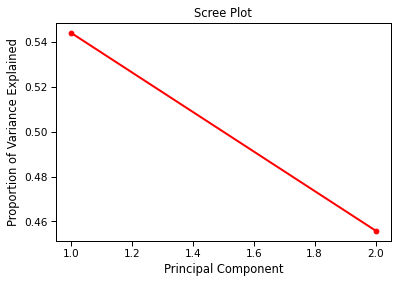

In [19]:
y = df[['Total', 'Side Total']]

scaler = StandardScaler()
scaler.fit(y)
Y=scaler.transform(y)
pca = PCA(n_components=1)
y_new = pca.fit_transform(Y)

df['length_accuracy']  = pd.DataFrame(y_new, index=df.index) # add back into dataframe with original index

#### Run model 3 - What variables are predictive of total accuracy

In [ ]:
length_accuracy_regression = linear_regression('length_accuracy')
length_accuracy_regression[0]

## 3. Visualise
#### Which variables are the most important to focus on for distance, accuracy and a distance/accuracy trade off

#### Maximising distance
1. Model performance is good. Most important variable is smash factor. 8 * more important than the next variable, followed
by Club Path, Face Angle and Face to Path.

#### Maximising accuracy
2. Model performance is OK. Most important variable is smash factor. 4 * more important than the next variable, followed
by Face to Path, Club Path and Face Angle.

#### Maximising distance/accuracy
3. Model performance is good. Most important variable is smash factor. 6 * more important than the next variable, followed
by Face to Path, Club Path and Face Angle.

In [ ]:
ax = sns.barplot(x="abs_coefs", y="est_int", data=distance_regression[1])
ax.set_xlabel('Absolute model coefficient')
ax.set_ylabel('')
ax.set_title('Distance')
ax.text(28, 10, distance_regression[0])
plt.show()


ax1 = sns.barplot(x="abs_coefs", y="est_int", data=accuracy_regression[1])
ax1.set_xlabel('Absolute model coefficient')
ax1.set_ylabel('')
ax1.set_title('Accuracy')
ax1.text(15, 10, accuracy_regression[0])
plt.show()

ax2 = sns.barplot(x="abs_coefs", y="est_int", data=length_accuracy_regression[1])
ax2.set_xlabel('Absolute model coefficient')
ax2.set_ylabel('')
ax2.set_title('Distance/accuracy')
ax2.text(0.65, 10, length_accuracy_regression[0])
plt.show()